<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from numpy import *
from math import sqrt

class LinearRegression:
    def __init__(self, x: float, y: float) -> float:
      self.x = x
      self.y = y
      self.__correlation_coefficient = self.__correlation_coefficient_()
      self.__inclination = self.__inclination_()
      self.__interception = self.__interception_()


    def __correlation_coefficient_(self) -> float:
      covariation = cov(self.x, self.y, bias=True)[0][1]

      x_variance = var(self.x)

      y_variance = var(self.y)

      return covariation / sqrt(x_variance * y_variance)

    def __inclination_(self) -> float:
      standard_desviation_x = std(self.x)

      standard_desviation_y = std(self.y)

      return self.__correlation_coefficient * (standard_desviation_y / standard_desviation_x)

    def __interception_(self) -> float:
      x_mean = mean(self.x)

      y_mean = mean(self.y)

      return y_mean - x_mean * self.__inclination

    def prediction(self, value: float):

      return self.__interception + (self.__inclination * value)

In [40]:
x = array([1,2,3,4,5])

y = array([2,4,6,8,10])


linear_regretion = LinearRegression(x, y)

prediction = linear_regretion.prediction(62.5)

prediction

125.0

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns

In [103]:
base = pd.read_csv('mt_cars.csv')

base.shape

(32, 12)

In [44]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [106]:
base = base.drop(['Unnamed: 0'], axis = 1)

base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: >

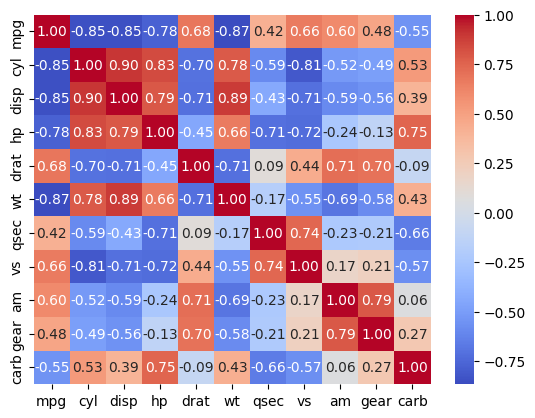

In [47]:
correlation = base.corr()

sns.heatmap(correlation, cmap="coolwarm", annot=True, fmt='.2f')

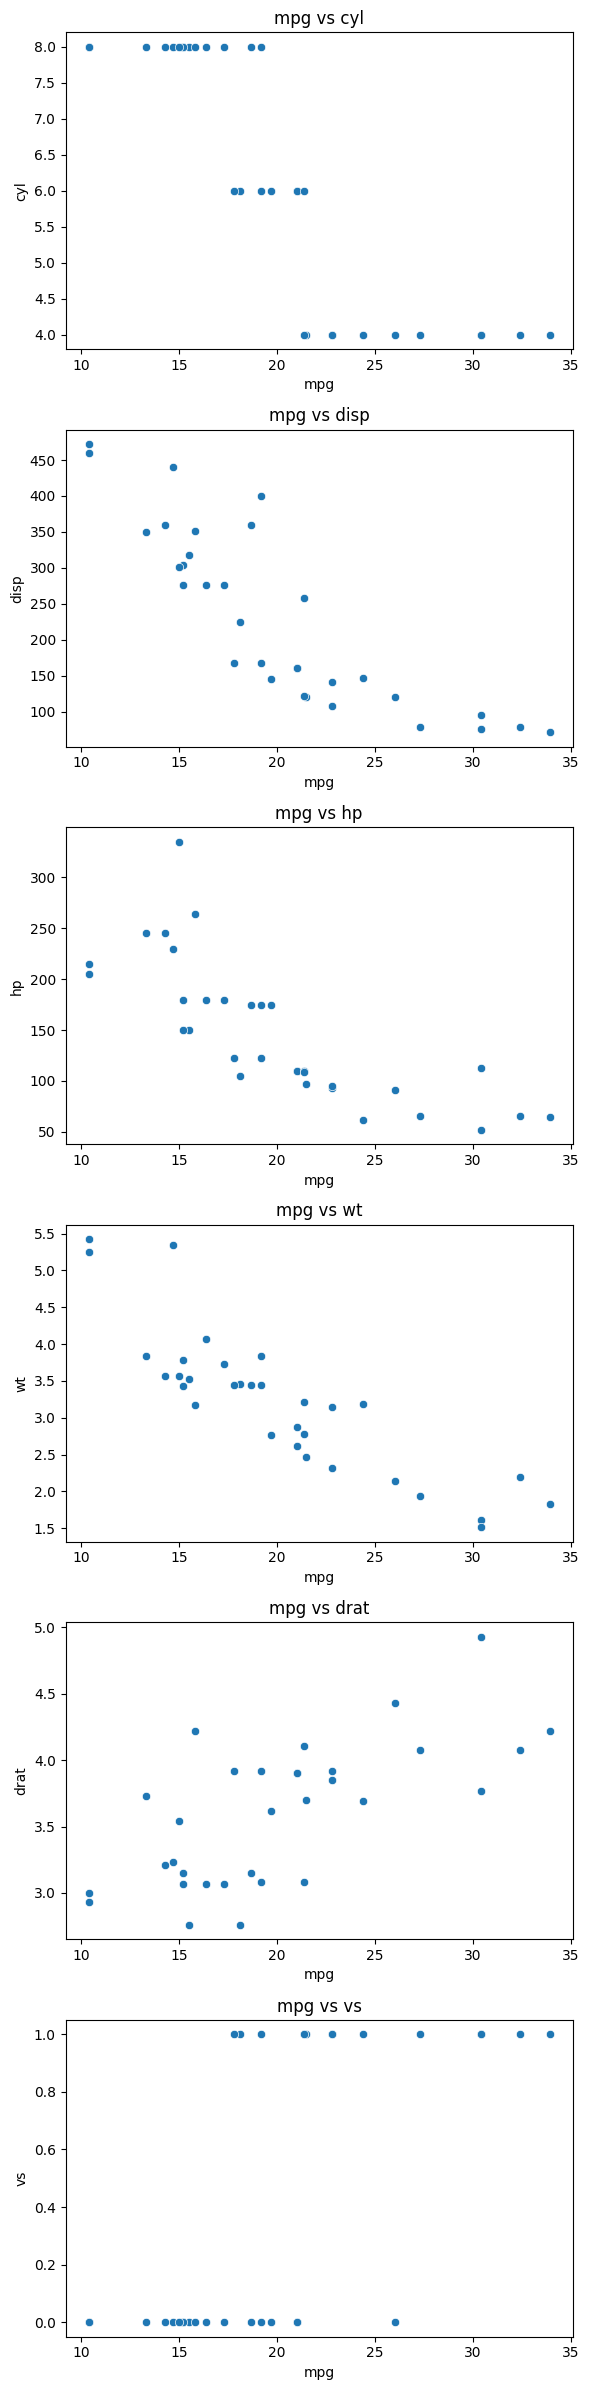

In [51]:
columns_pairs =[('mpg', 'cyl'), ('mpg', 'disp'), ('mpg', 'hp'), ('mpg', 'wt'), ('mpg', 'drat'), ('mpg', 'vs')]

n_plots = len(columns_pairs)


fig, axes = plt.subplots(nrows=n_plots, ncols = 1,figsize = (6,4 * n_plots))


for i, pair in enumerate(columns_pairs):
  x_col, y_col = pair

  sns.scatterplot(x=x_col, y = y_col, data = base, ax=axes[i])

  axes[i].set_title(f'{x_col} vs {y_col}')

plt.tight_layout()

plt.show()

In [76]:
model = sm.ols(formula='mpg ~ drat + vs', data=base)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.82e-07
Time:                        21:04:03   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# salva o modelo treinado

model.save('treined_model_2.pickle')

In [78]:
# carrega o mddelo trinado
import statsmodels.api as sma

loaded_model = sma.load('treined_model_2.pickle')


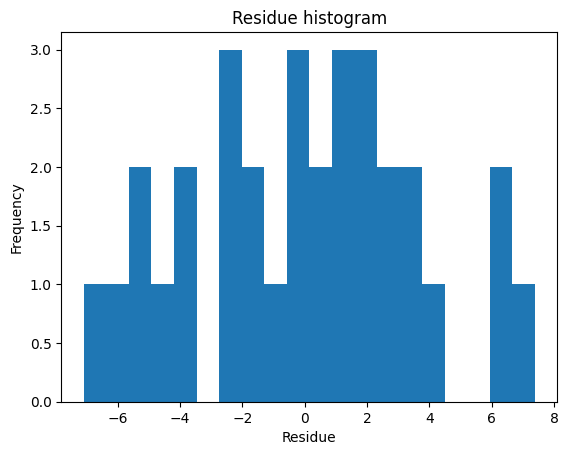

In [79]:
residue = loaded_model.resid

plt.hist(residue, bins=20)
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.title('Residue histogram')
plt.show()

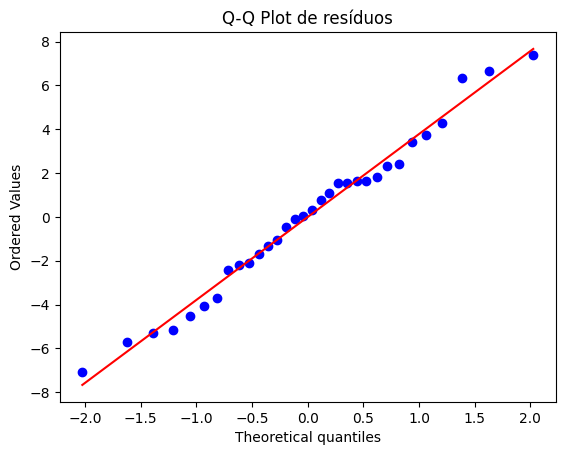

In [80]:
stats.probplot(residue, dist='norm', plot=plt)

plt.title('Q-Q Plot de resíduos')

plt.show()

In [81]:
# Teste de shapiro
# h0 - hipótese nula - dados estão normalmente distribuídos
# pval <= 0.05 rejeito a hipotese nula, (não estão normalmente distrbuídos)
# pval > 0.05 não é possível rejeitar a h0

stat, pval = stats.shapiro(residue)

print(f'Shapiro-Wilk estatística: {stat:.3f} p-value: {pval:.3f}')

if(pval > 0.05):
  print("Não dá para rejeitar a hipotese nula")
else:
  print('Já era a nula')


Shapiro-Wilk estatística: 0.981 p-value: 0.822
Não dá para rejeitar a hipotese nula


In [120]:
'''
  Vamos testar com uma amostra aleatória e verificar o resultaod
'''

import random

amo = base.sample() # vamos pegar uma amostra

mpg = amo.loc[:, 'mpg'];

print(f'mpg vale {mpg}')

amo = amo.drop('mpg', axis = 1)

amo

mpg vale 22    15.2
Name: mpg, dtype: float64


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22,8,304.0,150,3.15,3.435,17.3,0,0,3,2


In [121]:
loaded_model.predict(amo) # Vamos tentar predizer e comparar com o modelo anteriro

22    15.299814
dtype: float64